In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.


In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = ['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
df.rename(columns={"value": "page_views"}, inplace=True)

#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
top_percentile = df.page_views.quantile(0.975)
bottom_percentile = df.page_views.quantile(0.025)

In [5]:
filtered = df.loc[~((df.page_views >= top_percentile) | (df.page_views <= bottom_percentile)), :]
filtered.sort_index(inplace=True)
filtered

,page_views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

<img src="examples/Figure_1.png">

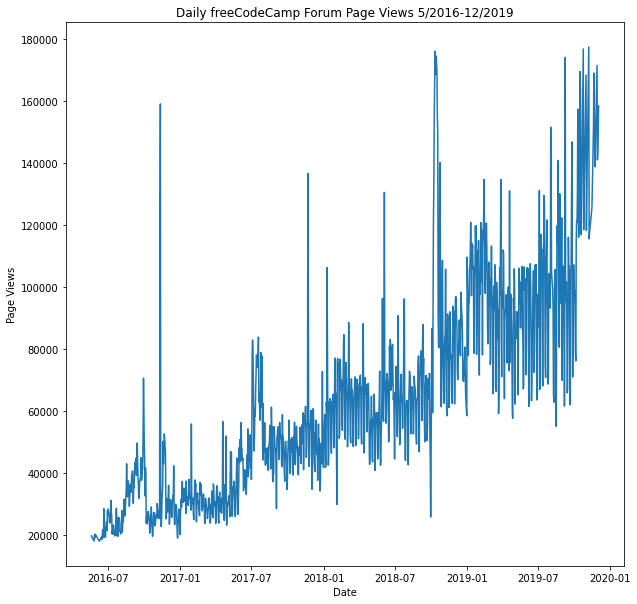

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(filtered.index, filtered.page_views)
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".



In [7]:
filtered.loc[:, 'Month'] = filtered.index.month
filtered.loc[:, 'Year'] = filtered.index.year
filtered

C:\Users\omara\miniconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\omara\miniconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,page_views,Month,Year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [8]:
grouped_data = filtered.groupby(['Month', 'Year']).page_views.mean()
grouped_data

Month  Year
1      2017     32785.161290
       2018     58580.096774
       2019    102056.516129
2      2017     31113.071429
       2018     65679.000000
       2019    105968.357143
3      2017     29369.096774
       2018     62693.774194
       2019     91214.483871
4      2017     30878.733333
       2018     62350.833333
       2019     89368.433333
5      2016     19432.400000
       2017     34244.290323
       2018     56562.870968
       2019     91439.903226
6      2016     21875.105263
       2017     43577.500000
       2018     70117.000000
       2019     90435.642857
7      2016     24109.678571
       2017     65806.838710
       2018     63591.064516
       2019     97236.566667
8      2016     31049.193548
       2017     47712.451613
       2018     62831.612903
       2019    102717.310345
9      2016     41476.866667
       2017     47376.800000
       2018     65941.733333
       2019     97268.833333
10     2016     27398.322581
       2017     47438.709677
  

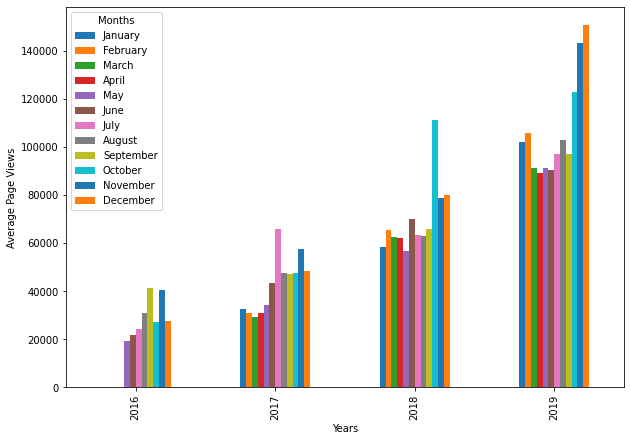

In [9]:
fig = grouped_data.unstack(0).plot.bar(figsize=(10, 7))
fig.set_xlabel('Years')
fig.set_ylabel('Average Page Views')
month_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.legend(title = 'Months', labels = month_labels, fontsize = 10)
plt.show()

<img src="examples/Figure_2.png" style="width:100; height:100">

Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

<img src="examples/Figure_3.png">

#### Assignment Source Code

In [10]:
df_box = df.copy()

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = ['date'])

# Clean data
df.rename(columns={"value": "page_views"}, inplace=True)

top_percentile = df.page_views.quantile(0.975)
bottom_percentile = df.page_views.quantile(0.025)

df = df.loc[~((df.page_views >= top_percentile) | (df.page_views <= bottom_percentile)), :]
df.sort_index(inplace = True)


def draw_line_plot():
    # Draw line plot
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(df.index, df.page_views)
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_modified = df.copy()
       
    df_modified.loc[:, 'Month'] = df_modified.index.month
    df_modified.loc[:, 'Year'] = df_modified.index.year
    
    df_bar = df_modified.groupby(['Month', 'Year']).page_views.mean()
    
    fig = df_bar.unstack(0).plot.bar(figsize=(10, 7))
    fig.set_xlabel('Years')
    fig.set_ylabel('Average Page Views')
    month_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    plt.legend(title = 'Months', labels = month_labels, fontsize = 10)
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    fig, axes = plt.subplots(1, 2)
    fig.set_figwidth(30)
    fig.set_figheight(10)
    
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] =  df.index.year 
    df_box['month'] = df.index.month_name()
    df_box['month_num'] = df.index.month
    df_box.sort_values("month_num", inplace=True)
    df_box.reset_index(inplace=True)
    
    # Draw box plots (using Seaborn)
    ax1 = sns.boxplot(x="month", y="page_views", data=df_box, ax = axes[1])
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Page Views')
    ax1.set_title("Month-wise Box Plot (Seasonality)")

    ax2 = sns.boxplot(x="year", y="page_views", data=df_box, ax = axes[0])
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Page Views')
    ax2.set_title("Year-wise Box Plot (Trend)")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

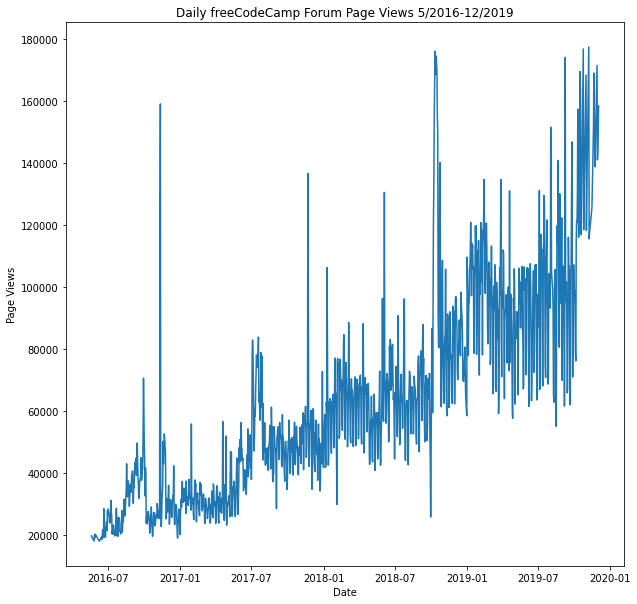

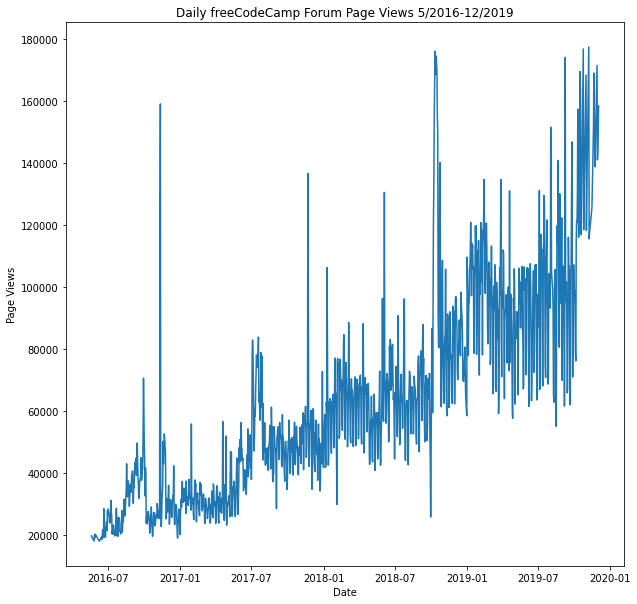

In [12]:
draw_line_plot()

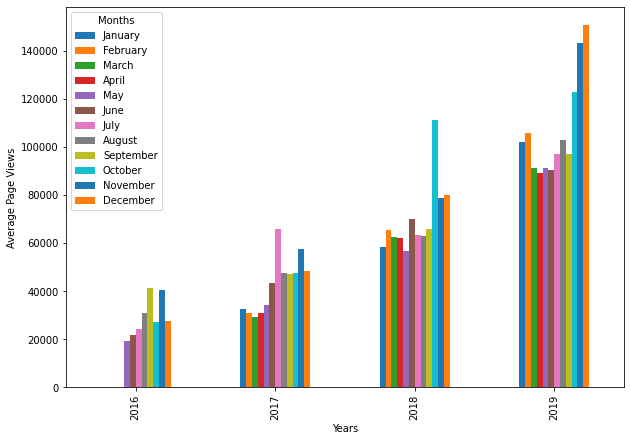

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [13]:
draw_bar_plot()

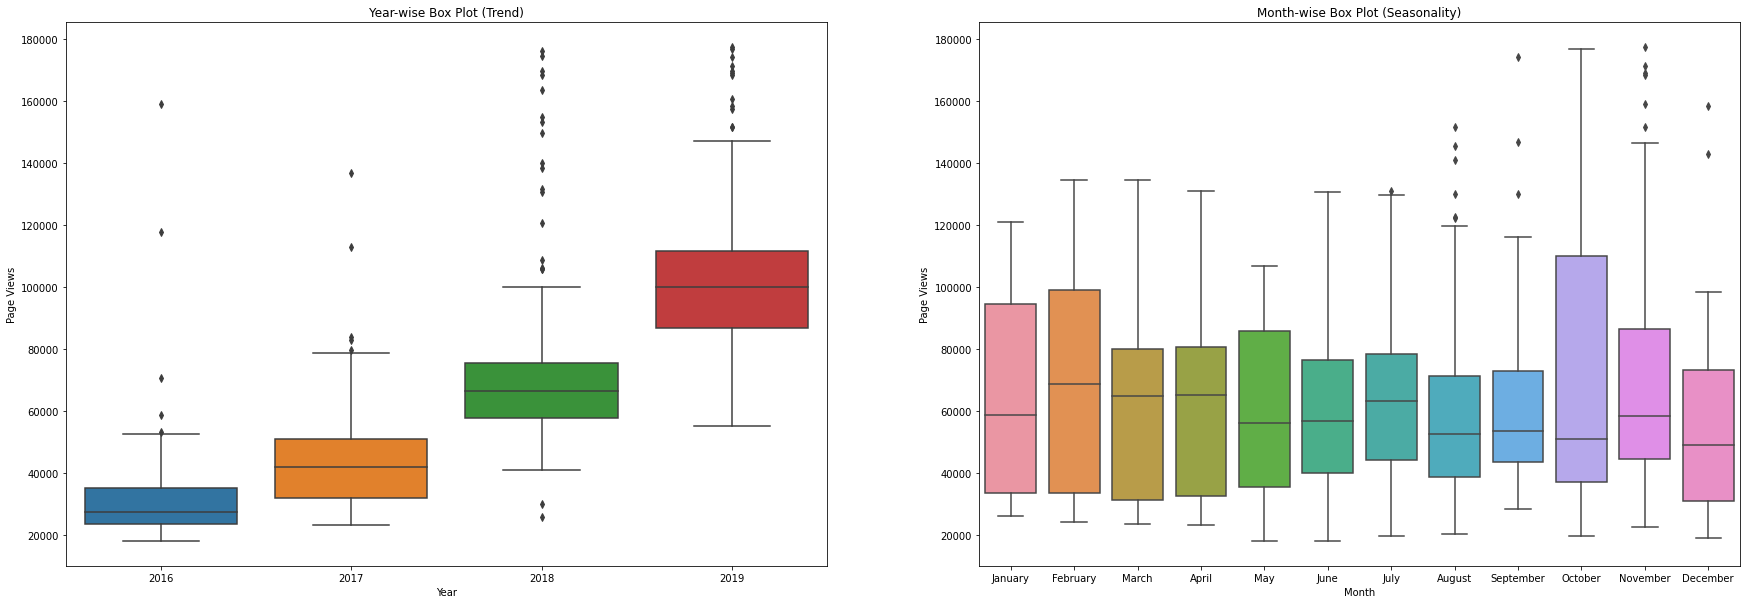

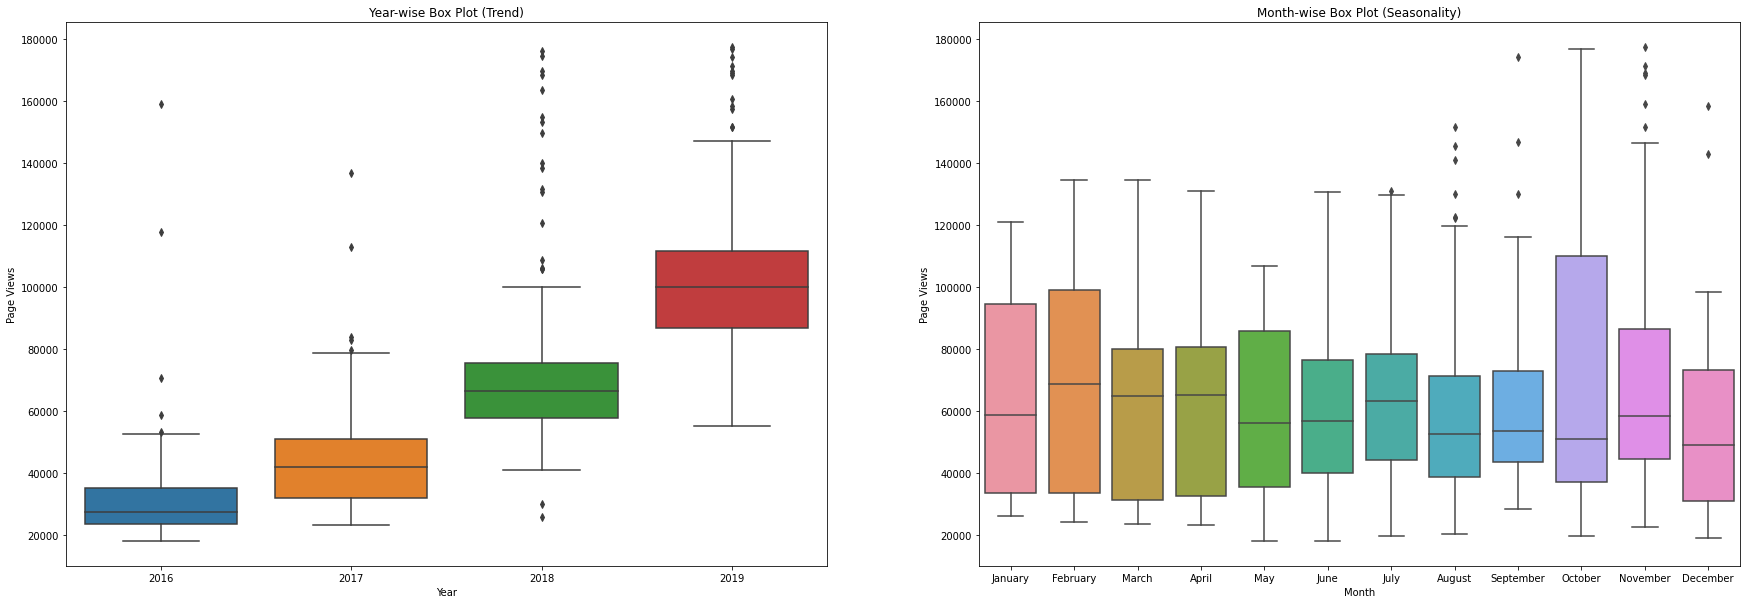

In [14]:
draw_box_plot()